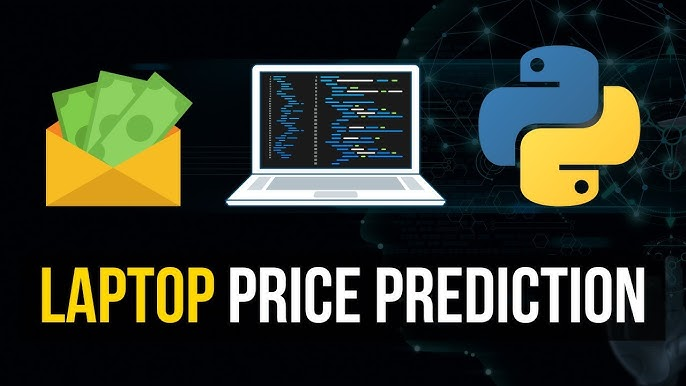

This public dataset presents a comprehensive collection of 991 unique laptops sourced from the 'Smartprix' website. Enriched with 22 features including laptop name, price in Indian rupees, processor, GPU, and more, it provides valuable insights for building robust price prediction models and effective recommendation systems

Dataset Link - https://www.kaggle.com/datasets/bhavikjikadara/brand-laptops-dataset


About the laptops.csv file:
* Brand : The name of the laptop brand.
<br>
*  Model : The specific model or series of the laptop.
<br>
* Price : The price of the laptop in Indian rupees.
<br>
* Rating : The rating assigned to each laptop based on its specifications.
<br>
* Processor brand : The brand of the processor used in the laptop.
<br>
* Processor tier : The performance tier or category of the processor.
<br>
* Number of Cores : The number of processing cores in the processor.
<br>

* Number of Threads : The number of threads supported by the processor.
<br>
* Ram memory : The amount of RAM used in the laptop.
<br>
* Primary storage type : The type of primary storage (e.g., HDD, SSD).
<br>
* Primary storage capacity : The capacity of the primary storage in the laptop.
<br>
* Secondary storage type : The type of secondary storage, if available.
<br>
* Secondary storage capacity : The capacity of the secondary storage in the laptop.
<br>
* GPU brand : The brand of the graphics processing unit (GPU).
<br>
* GPU type : The type of the GPU.
<br>
* Is Touch screen : Indicates whether the laptop has a touch screen feature.
<br>
* Display size : The size of the laptop display in inches.
<br>
* Resolution width : The width resolution of the display.
<br>
* Resolution height : The height resolution of the display.
<br>
* OS : The operating system installed on the laptop.
<br>
* Year of warranty : The duration of the warranty provided for the laptop, usually in years

### Importing Libraries and Loading CSV Data

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [99]:
data=pd.read_csv("laptops.csv")
data.shape

(991, 22)

In [100]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,SSD,512,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,SSD,1024,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,SSD,512,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,SSD,512,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,SSD,512,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


### EDA

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

In [102]:
# Removing useless columns
data.drop(['index','Model','processor_tier'],axis=1,inplace=True)

Text(0.5, 1.0, 'Rating Distribution')

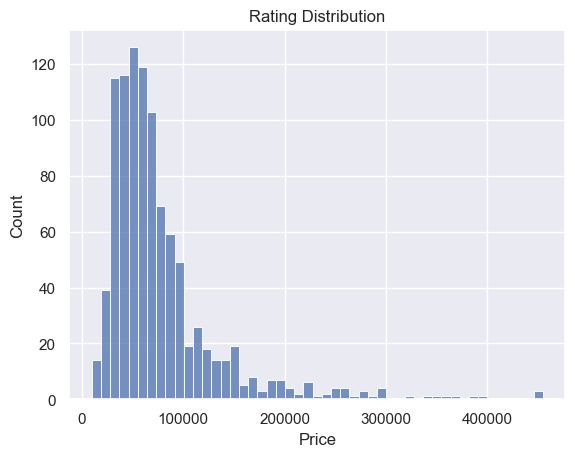

In [103]:
sns.histplot(data['Price'])

plt.title("Rating Distribution")

In [104]:
data.brand.value_counts()

brand
asus         210
hp           205
lenovo       201
dell         106
msi           90
acer          89
apple         15
infinix       13
samsung        7
zebronics      7
lg             7
ultimus        6
fujitsu        5
avita          5
wings          4
chuwi          4
realme         2
microsoft      2
tecno          2
axl            2
honor          2
gigabyte       2
primebook      2
jio            1
walker         1
iball          1
Name: count, dtype: int64

In [105]:
# Grouping brand column

data.groupby("brand")['Price'].mean().sort_values().index
budget_brands=['iball', 'primebook', 'jio', 'walker', 'axl', 'ultimus', 'avita',
       'chuwi', 'tecno', 'wings', 'infinix', 'zebronics', 'realme', 'honor']
budget_brands_col=data['brand'].isin(budget_brands)
# np.sum(premium_brands_col)
budget_brands_col.sum()

52

In [106]:
data['budget_laptop_brand']=budget_brands_col.astype('int')

In [107]:
data.budget_laptop_brand.value_counts()

budget_laptop_brand
0    939
1     52
Name: count, dtype: int64

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   brand                       991 non-null    object 
 1   Price                       991 non-null    int64  
 2   Rating                      991 non-null    int64  
 3   processor_brand             991 non-null    object 
 4   num_cores                   991 non-null    int64  
 5   num_threads                 991 non-null    int64  
 6   ram_memory                  991 non-null    int64  
 7   primary_storage_type        991 non-null    object 
 8   primary_storage_capacity    991 non-null    int64  
 9   secondary_storage_type      991 non-null    object 
 10  secondary_storage_capacity  991 non-null    int64  
 11  gpu_brand                   991 non-null    object 
 12  gpu_type                    991 non-null    object 
 13  is_touch_screen             991 non

In [109]:
data['Rating'].describe()

count    991.000000
mean      63.931382
std       10.190575
min       24.000000
25%       58.000000
50%       64.000000
75%       71.000000
max       89.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Rating Distribution')

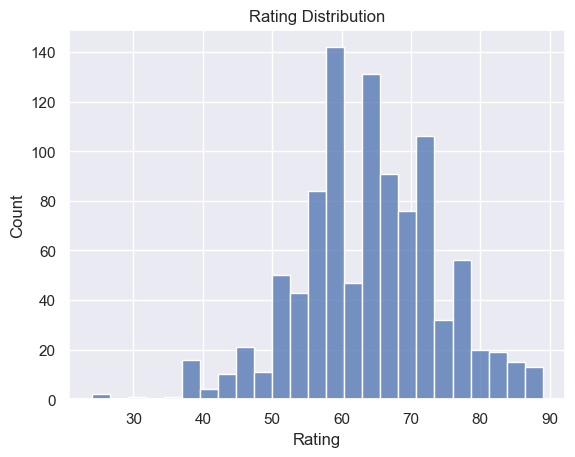

In [110]:
sns.histplot(data['Rating'])
plt.title("Rating Distribution")

In [111]:
data.drop(['brand'],axis=1,inplace=True)

### Creating dummy variables for processor

In [112]:
data['processor_brand'].value_counts()

processor_brand
intel    705
amd      267
apple     15
other      4
Name: count, dtype: int64

In [113]:
data[data['processor_brand']=='other']

,Price,Rating,processor_brand,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,budget_laptop_brand
70,14990,26,other,8,0,4,HDD,64,No secondary storage,0,arm,integrated,False,11.6,1366,768,android,1,1
192,14701,24,other,8,0,4,HDD,64,No secondary storage,0,arm,integrated,False,11.6,1366,768,other,1,1
372,12990,31,other,8,0,4,HDD,64,No secondary storage,0,arm,integrated,False,11.6,1366,768,other,1,1
952,39551,43,other,8,0,8,SSD,256,No secondary storage,0,arm,integrated,True,13.3,1920,1080,chrome,1,0


In [114]:
data.shape

(991, 19)

In [115]:
data=pd.concat([data,pd.get_dummies(data['processor_brand'],dtype=int,prefix='processor')],axis=1)
data.shape

(991, 23)

In [116]:
data.head()

,Price,Rating,processor_brand,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,budget_laptop_brand,processor_amd,processor_apple,processor_intel,processor_other
0,23990,63,intel,2,4,8,SSD,512,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1,1,0,0,1,0
1,35990,67,intel,4,8,16,SSD,1024,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1,1,0,0,1,0
2,51100,73,amd,6,12,8,SSD,512,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1,0,1,0,0,0
3,39990,62,intel,12,16,8,SSD,512,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1,0,0,0,1,0
4,28580,62,amd,4,8,8,SSD,512,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1,0,1,0,0,0


In [117]:
data.drop(['processor_brand','processor_amd','processor_other'],axis=1,inplace=True)

### Overview of storage and gpu columns

In [118]:
data['primary_storage_type'].value_counts()

primary_storage_type
SSD    964
HDD     27
Name: count, dtype: int64

In [119]:
# Removing this column as SSD is used in more than 95% laptops.
data.drop(['primary_storage_type'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       991 non-null    int64  
 1   Rating                      991 non-null    int64  
 2   num_cores                   991 non-null    int64  
 3   num_threads                 991 non-null    int64  
 4   ram_memory                  991 non-null    int64  
 5   primary_storage_capacity    991 non-null    int64  
 6   secondary_storage_type      991 non-null    object 
 7   secondary_storage_capacity  991 non-null    int64  
 8   gpu_brand                   991 non-null    object 
 9   gpu_type                    991 non-null    object 
 10  is_touch_screen             991 non-null    bool   
 11  display_size                991 non-null    float64
 12  resolution_width            991 non-null    int64  
 13  resolution_height           991 non

In [120]:
data['primary_storage_capacity'].describe()

count     991.000000
mean      610.938446
std       266.927666
min        32.000000
25%       512.000000
50%       512.000000
75%       512.000000
max      2048.000000
Name: primary_storage_capacity, dtype: float64

In [121]:
data['secondary_storage_type'].value_counts()

secondary_storage_type
No secondary storage    976
SSD                      15
Name: count, dtype: int64

In [122]:
data['secondary_storage_capacity'].value_counts()

secondary_storage_capacity
0      976
256     13
128      1
512      1
Name: count, dtype: int64

In [123]:
# Removing this columnas 97% laptops dont have secondary storage
data.drop(['secondary_storage_type','secondary_storage_capacity'],axis=1,inplace=True)

In [124]:
data.columns

Index(['Price', 'Rating', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_capacity', 'gpu_brand', 'gpu_type', 'is_touch_screen',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'year_of_warranty', 'budget_laptop_brand', 'processor_apple',
       'processor_intel'],
      dtype='object')

In [125]:
data['gpu_brand'].value_counts()

gpu_brand
intel     462
nvidia    343
amd       167
apple      15
arm         4
Name: count, dtype: int64

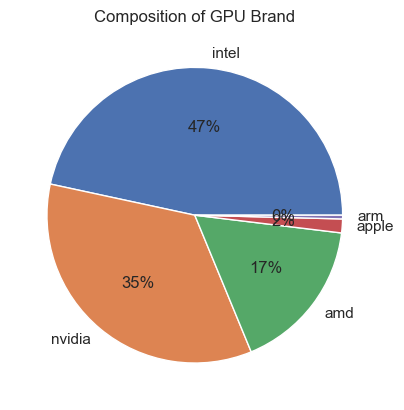

In [126]:
gpu=data['gpu_brand'].value_counts()
plt.pie(gpu,labels=gpu.index,autopct='%.f%%')
plt.title("Composition of GPU Brand")
plt.show()

In [127]:
data['gpu_type'].value_counts()

gpu_type
integrated    616
dedicated     360
apple          15
Name: count, dtype: int64

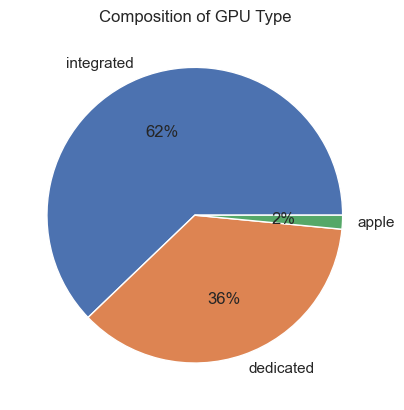

In [128]:
gpu=data['gpu_type'].value_counts()
plt.pie(gpu,labels=gpu.index,autopct='%.f%%')
plt.title("Composition of GPU Type")
plt.show()

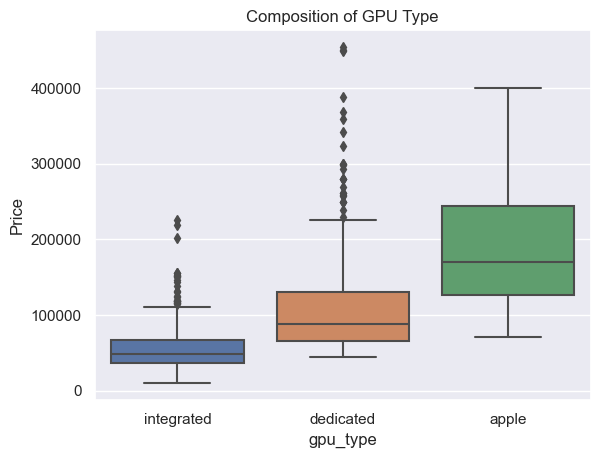

In [129]:
sns.boxplot(data=data,x='gpu_type',y='Price')
plt.title("Composition of GPU Type")
plt.show()

### Mapping gpu column

In [130]:
data['gpu_type']=data['gpu_type'].map({'integrated':0,'dedicated':1,'apple':1})
data['gpu_type'].value_counts()

gpu_type
0    616
1    375
Name: count, dtype: int64

In [131]:
data.drop(['gpu_brand'],axis=1,inplace=True)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     991 non-null    int64  
 1   Rating                    991 non-null    int64  
 2   num_cores                 991 non-null    int64  
 3   num_threads               991 non-null    int64  
 4   ram_memory                991 non-null    int64  
 5   primary_storage_capacity  991 non-null    int64  
 6   gpu_type                  991 non-null    int64  
 7   is_touch_screen           991 non-null    bool   
 8   display_size              991 non-null    float64
 9   resolution_width          991 non-null    int64  
 10  resolution_height         991 non-null    int64  
 11  OS                        991 non-null    object 
 12  year_of_warranty          991 non-null    object 
 13  budget_laptop_brand       991 non-null    int32  
 14  processor_

In [133]:
# Mapping touch screen column to have 0 or 1 only.
data['is_touch_screen']=data['is_touch_screen'].astype("int64")

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     991 non-null    int64  
 1   Rating                    991 non-null    int64  
 2   num_cores                 991 non-null    int64  
 3   num_threads               991 non-null    int64  
 4   ram_memory                991 non-null    int64  
 5   primary_storage_capacity  991 non-null    int64  
 6   gpu_type                  991 non-null    int64  
 7   is_touch_screen           991 non-null    int64  
 8   display_size              991 non-null    float64
 9   resolution_width          991 non-null    int64  
 10  resolution_height         991 non-null    int64  
 11  OS                        991 non-null    object 
 12  year_of_warranty          991 non-null    object 
 13  budget_laptop_brand       991 non-null    int32  
 14  processor_

In [135]:
data['is_touch_screen'].value_counts()

is_touch_screen
0    903
1     88
Name: count, dtype: int64

In [136]:
data['year_of_warranty'].value_counts()

year_of_warranty
1                 900
2                  63
No information     18
3                  10
Name: count, dtype: int64

In [137]:
# Year of warranties column values.No proprcessing done.
data['year_of_warranty']=data['year_of_warranty'].map({'1':1,'2':2,'3':3,'No information':0})
data['year_of_warranty'].value_counts()

year_of_warranty
1    900
2     63
0     18
3     10
Name: count, dtype: int64

### Creating dummy variables for OS type

In [138]:
data['OS'].value_counts()

OS
windows    924
dos         32
chrome      16
mac         15
other        2
android      1
ubuntu       1
Name: count, dtype: int64

In [139]:
# Removing rows with rare OS

ind_to_del=data[data['OS'].isin(['android','ubuntu','other'])].index
data.drop(ind_to_del,axis=0,inplace=True)

In [140]:
data['OS'].value_counts()

OS
windows    924
dos         32
chrome      16
mac         15
Name: count, dtype: int64

In [141]:
data=pd.concat([data,pd.get_dummies(data['OS'],dtype=int,drop_first=True,prefix='OS')],axis=1)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 0 to 990
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     987 non-null    int64  
 1   Rating                    987 non-null    int64  
 2   num_cores                 987 non-null    int64  
 3   num_threads               987 non-null    int64  
 4   ram_memory                987 non-null    int64  
 5   primary_storage_capacity  987 non-null    int64  
 6   gpu_type                  987 non-null    int64  
 7   is_touch_screen           987 non-null    int64  
 8   display_size              987 non-null    float64
 9   resolution_width          987 non-null    int64  
 10  resolution_height         987 non-null    int64  
 11  OS                        987 non-null    object 
 12  year_of_warranty          987 non-null    int64  
 13  budget_laptop_brand       987 non-null    int32  
 14  processor_apple

In [143]:
data.drop(['OS'],axis=1,inplace=True)


### Heatmap of Correlation Matrix

<Axes: >

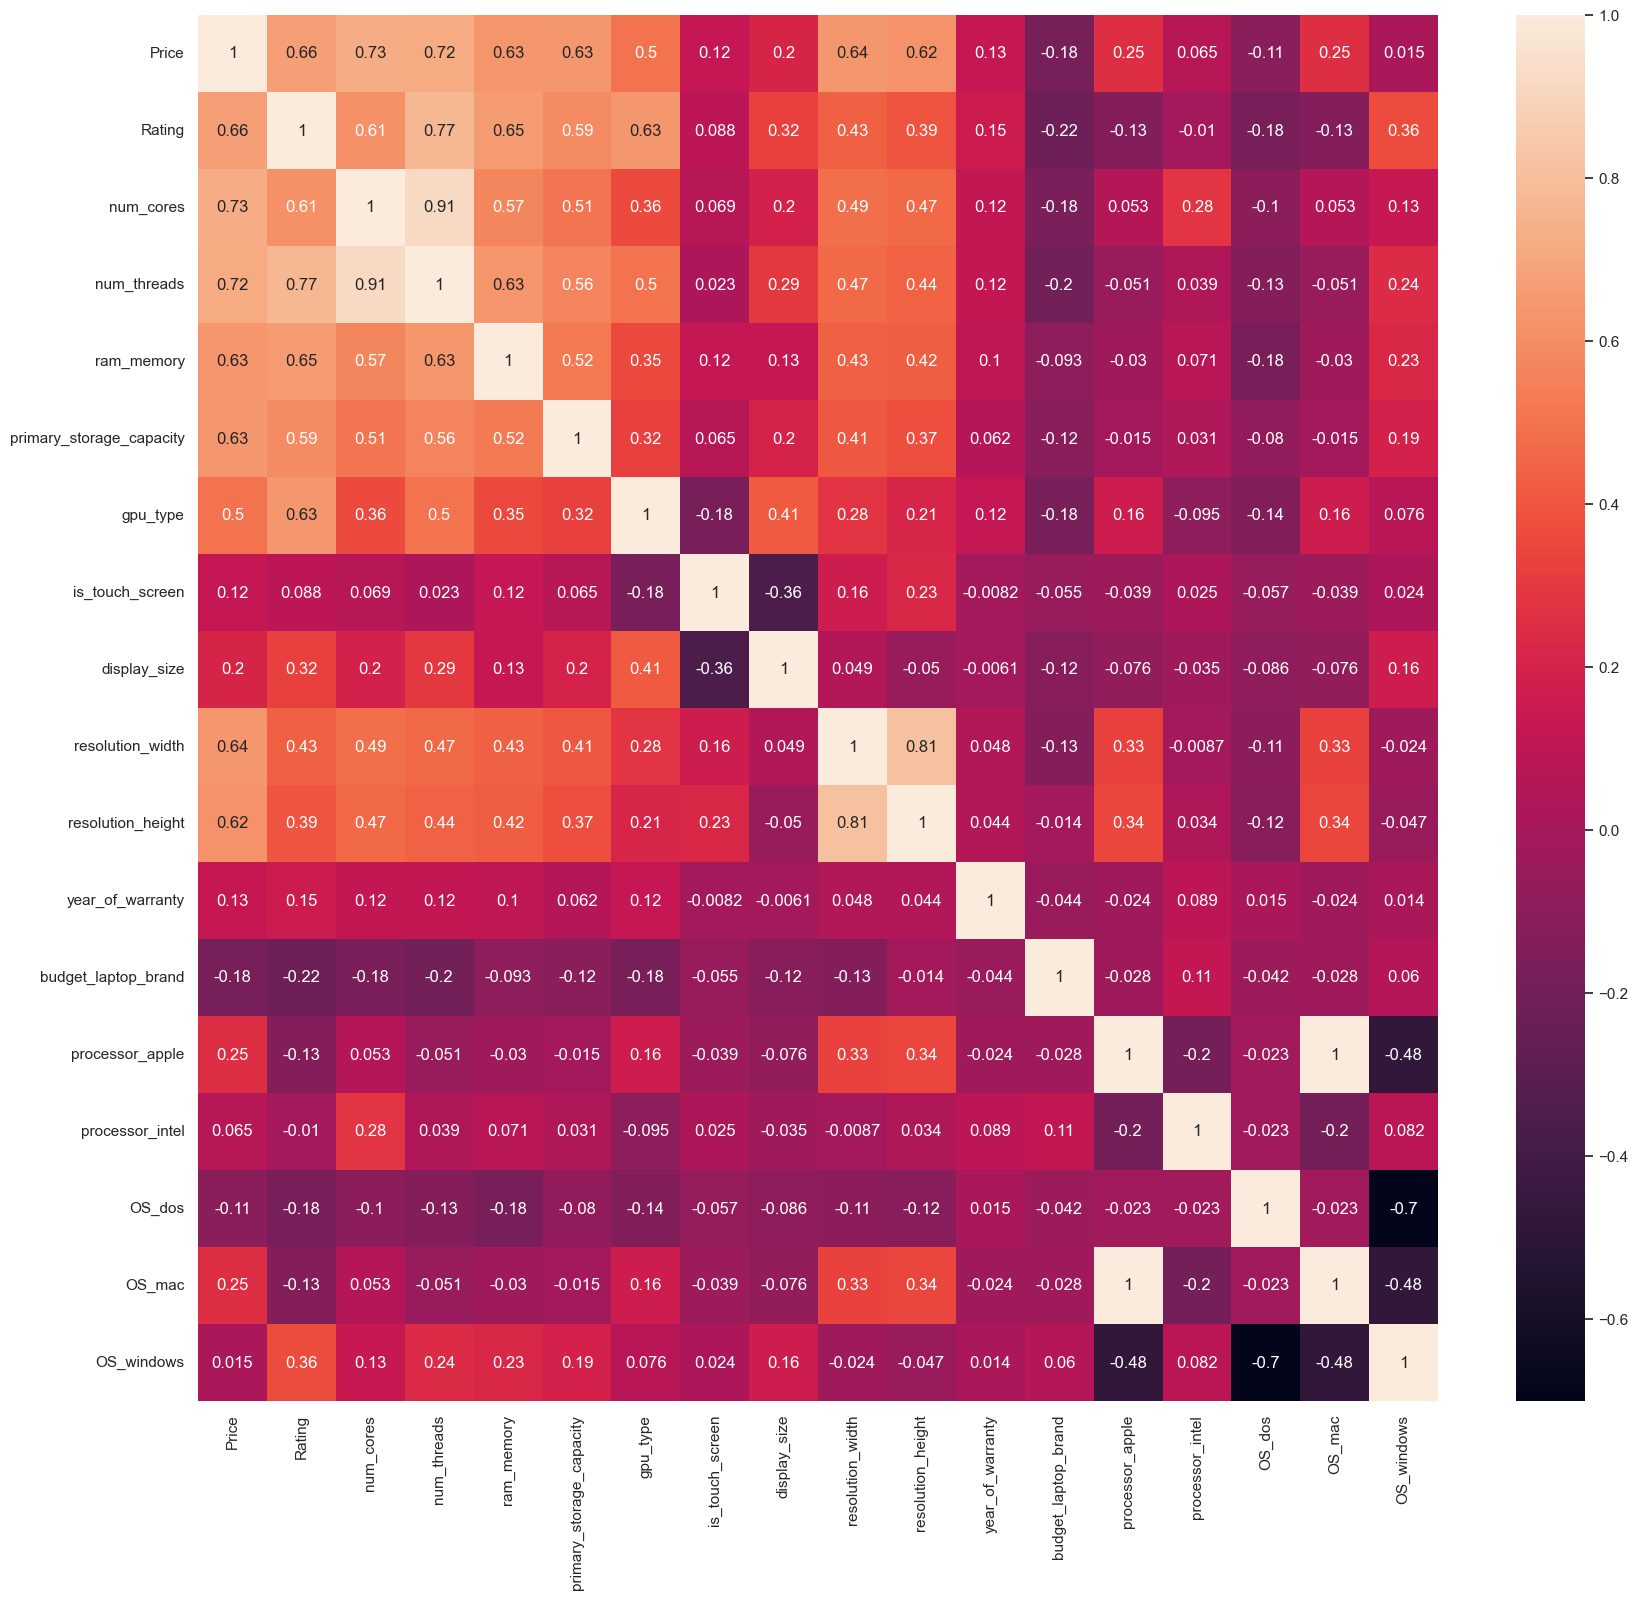

In [144]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True)

### Multicollinearity observed between:
* threads and cores
* mac_OS and mac_processor
* height and width of screen

#### Removed these columns in model 3

____________________________________________________________________________________________________
# Machine Learning Process  (Multivariate Regression)


<br>
<br>

### Model 1: With all columns

In [145]:
data.columns.values

array(['Price', 'Rating', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_capacity', 'gpu_type', 'is_touch_screen',
       'display_size', 'resolution_width', 'resolution_height',
       'year_of_warranty', 'budget_laptop_brand', 'processor_apple',
       'processor_intel', 'OS_dos', 'OS_mac', 'OS_windows'], dtype=object)

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

targets=data['Price']
inputs=data.drop(['Price'],axis=1)

columns_to_scale=[ 'Rating', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_capacity',
       'display_size', 'resolution_width', 'resolution_height',
       'year_of_warranty']

scaler=StandardScaler()
scaled_inputs=inputs.copy()
scaled_inputs.loc[:,columns_to_scale]=np.array(scaler.fit_transform(inputs.loc[:,columns_to_scale]))

reg=LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.15)

In [147]:
reg.fit(X_train,y_train)

LinearRegression()

In [148]:
reg.score(X_train,y_train)

0.7915492484781567

In [149]:
reg.score(X_test,y_test)

0.6808530232690589

In [150]:
# Coefficients of Model1

reg2_info=pd.DataFrame(reg.coef_,index=inputs.columns)
reg2_info

,0
Rating,9548.203381
num_cores,26572.460123
num_threads,-12416.790550
ram_memory,9811.556654
primary_storage_capacity,12980.639479
gpu_type,15148.190992
is_touch_screen,8460.633709
display_size,1815.613965
resolution_width,4560.540319
resolution_height,7895.867498


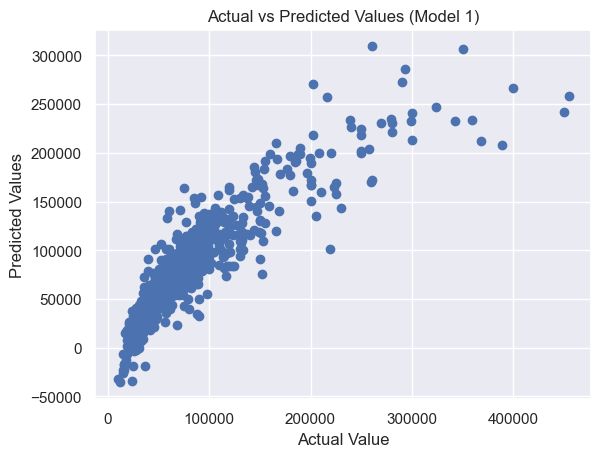

In [151]:
predictions=reg.predict(X_train)
plt.scatter(y_train,predictions)
plt.title("Actual vs Predicted Values (Model 1)")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Values")
plt.show()

In [152]:
import statsmodels.api as sm

X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()

In [153]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     194.8
Date:                Sat, 16 Mar 2024   Prob (F-statistic):          2.30e-266
Time:                        22:15:32   Log-Likelihood:                -9733.4
No. Observations:                 838   AIC:                         1.950e+04
Df Residuals:                     821   BIC:                         1.958e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.108e+05   8396.709     13.197      0.000    9.43e+04    1.27e+05
Rating                    9548.2034   2197.965      4.344      0.000    5233.910    1.39e+04
num_cores                 2.657e+04   3716.348      7.150      0.000    1.93e+04    3.39e+04
num_threads              -1.242e+04   4178.983     -2.971      0.003   -2.06e+04   -4214.041
ram_memory                9811.5567   1332.784      7.362      0.000    7195.491    1.24e+04
primary_storage_capacity  1.298e+04   1208.161     10.744      0.000    1.06e+04    1.54e+04
gpu_type                  1.515e+04   3003.177      5.044      0.000    9253.382     2.1e+04
is_touch_screen           8460.6337   3904.189      2.167      0.031     797.266    1.61e+04
display_size              1815.6140   1122.518      1.617      0.106    -387.729    4018.957
resolution_width          4560.5403   1710.887      2.666      0.008    1202.312    7918.769
resolution_height         7895.8675   1767.363      4.468      0.000    4426.786    1.14e+04
year_of_warranty          1719.0021    927.877      1.853      0.064    -102.288    3540.292
budget_laptop_brand      -2730.8043   4556.859     -0.599      0.549   -1.17e+04    6213.661
processor_apple           1.791e+04   5997.724      2.986      0.003    6136.331    2.97e+04
processor_intel          -4631.6542   3096.029     -1.496      0.135   -1.07e+04    1445.410
OS_dos                   -2.595e+04   9265.850     -2.800      0.005   -4.41e+04   -7759.347
OS_mac                    1.791e+04   5997.724      2.986      0.003    6136.331    2.97e+04
OS_windows               -3.875e+04   7825.212     -4.952      0.000   -5.41e+04   -2.34e+04
==============================================================================
Omnibus:                      464.860   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6584.041
Skew:                           2.201   Prob(JB):                         0.00
Kurtosis:                      16.007   Cond. No.                     6.12e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### P-Values of Model 1

In [154]:

model_summary=pd.DataFrame(model.pvalues.values,index=['Constant', 'Rating', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_capacity', 'gpu_type', 'is_touch_screen',
       'display_size', 'resolution_width', 'resolution_height',
       'year_of_warranty', 'budget_laptop_brand', 'processor_apple',
       'processor_intel', 'OS_dos', 'OS_mac', 'OS_windows'])
np.round(model_summary,decimals=3)

,0
Constant,0.000
Rating,0.000
num_cores,0.000
num_threads,0.003
ram_memory,0.000
primary_storage_capacity,0.000
gpu_type,0.000
is_touch_screen,0.031
display_size,0.106
resolution_width,0.008


## Model 2: With log Prices

In [170]:


targets=data['Price']
inputs=data.drop(['Price'],axis=1)

scaler=StandardScaler()
# scaled_inputs=scaler.fit_transform(inputs)

scaled_inputs=inputs.copy()
scaled_inputs.loc[:,columns_to_scale]=np.array(scaler.fit_transform(inputs.loc[:,columns_to_scale]))
reg=LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.15)

In [171]:
reg2=LinearRegression()

log_y_train=np.log(y_train)
log_y_test=np.log(y_test)
reg2.fit(X_train,log_y_train)


LinearRegression()

In [172]:
reg2.score(X_train,log_y_train)

0.890043637498483

In [173]:
reg2.score(X_test,log_y_test)

0.8923986798612652

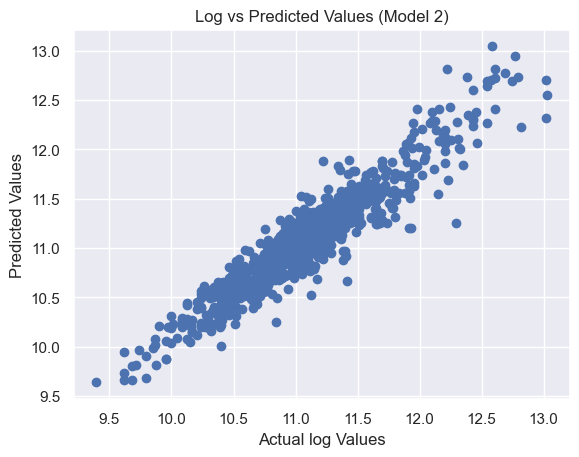

In [174]:
predictions2=reg2.predict(X_train)
plt.scatter(log_y_train,predictions2)
plt.title("Log vs Predicted Values (Model 2)")
plt.xlabel("Actual log Values")
plt.ylabel("Predicted Values")
plt.show()

In [175]:
reg2_info=pd.DataFrame(reg2.coef_,index=inputs.columns)
reg2_info

,0
Rating,0.149190
num_cores,0.147181
num_threads,0.058035
ram_memory,0.077332
primary_storage_capacity,0.072354
gpu_type,0.163495
is_touch_screen,0.192045
display_size,-0.018626
resolution_width,-0.003041
resolution_height,0.074633


In [176]:
import statsmodels.api as sm

X_train=sm.add_constant(X_train)
model=sm.OLS(log_y_train,X_train).fit()

In [177]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     415.3
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:41:21   Log-Likelihood:                 195.55
No. Observations:                 838   AIC:                            -357.1
Df Residuals:                     821   BIC:                            -276.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.9309      0.061    178.276      0.000      10.811      11.051
Rating                       0.1492      0.016      9.506      0.000       0.118       0.180
num_cores                    0.1472      0.027      5.361      0.000       0.093       0.201
num_threads                  0.0580      0.031      1.870      0.062      -0.003       0.119
ram_memory                   0.0773      0.010      8.000      0.000       0.058       0.096
primary_storage_capacity     0.0724      0.009      8.223      0.000       0.055       0.090
gpu_type                     0.1635      0.022      7.522      0.000       0.121       0.206
is_touch_screen              0.1920      0.027      7.010      0.000       0.138       0.246
display_size                -0.0186      0.008     -2.279      0.023      -0.035      -0.003
resolution_width            -0.0030      0.012     -0.244      0.807      -0.027       0.021
resolution_height            0.0746      0.013      5.929      0.000       0.050       0.099
year_of_warranty             0.0113      0.007      1.651      0.099      -0.002       0.025
budget_laptop_brand         -0.3620      0.033    -10.899      0.000      -0.427      -0.297
processor_apple              0.4676      0.046     10.219      0.000       0.378       0.557
processor_intel              0.0458      0.022      2.088      0.037       0.003       0.089
OS_dos                       0.0424      0.066      0.638      0.524      -0.088       0.173
OS_mac                       0.4676      0.046     10.219      0.000       0.378       0.557
OS_windows                   0.0389      0.057      0.679      0.498      -0.074       0.151
==============================================================================
Omnibus:                       82.225   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.506
Skew:                           0.595   Prob(JB):                     1.56e-37
Kurtosis:                       4.855   Cond. No.                     1.80e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model 3: With log prices and without non significant and inner correlated columns




#### Statistically insignificant column - Budget Laptop Brand
#### Inner highly correlated columns - num_threads,resolution_height,OS_mac

In [180]:
reg3=LinearRegression()



targets=np.log(data['Price'])
inputs=data.drop(['Price','budget_laptop_brand','num_threads','resolution_height','OS_mac'],axis=1)

scaler=StandardScaler()
# scaled_inputs=scaler.fit_transform(inputs)

columns_to_scale=[ 'Rating', 'num_cores','ram_memory',
       'primary_storage_capacity',
       'display_size', 'resolution_width',
       'year_of_warranty']
scaled_inputs=inputs.copy()
scaled_inputs.loc[:,columns_to_scale]=np.array(scaler.fit_transform(inputs.loc[:,columns_to_scale]))

X_train,X_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.15)

In [181]:
reg3.fit(X_train,y_train)

LinearRegression()

In [182]:
reg3.score(X_train,y_train)

0.8699136555331317

In [183]:
reg3.score(X_test,y_test)

0.8802838593347981

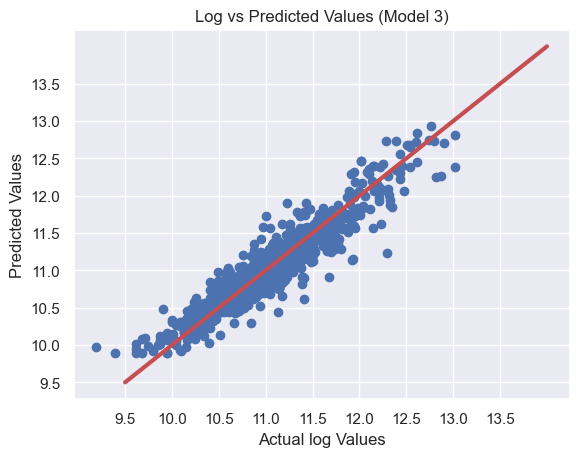

In [184]:
predictions3=reg3.predict(X_train)
plt.scatter(y_train,predictions3)
plt.plot([9.5,10,11,12,13,14],[9.5,10,11,12,13,14],linewidth=3,color='r')
plt.xticks(np.arange(9.5,14,0.5))
plt.yticks(np.arange(9.5,14,0.5))
plt.title("Log vs Predicted Values (Model 3)")
plt.xlabel("Actual log Values")
plt.ylabel("Predicted Values")
plt.show()

In [185]:
import statsmodels.api as sm

X_train=sm.add_constant(X_train)
model3=sm.OLS(y_train,X_train).fit()

In [186]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     423.9
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:43:16   Log-Likelihood:                 121.91
No. Observations:                 838   AIC:                            -215.8
Df Residuals:                     824   BIC:                            -149.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.0908      0.066    169.078      0.000      10.962      11.220
Rating                       0.1924      0.016     12.033      0.000       0.161       0.224
num_cores                    0.2032      0.011     18.112      0.000       0.181       0.225
ram_memory                   0.0693      0.011      6.580      0.000       0.049       0.090
primary_storage_capacity     0.0826      0.010      8.260      0.000       0.063       0.102
gpu_type                     0.1497      0.023      6.467      0.000       0.104       0.195
is_touch_screen              0.2272      0.029      7.775      0.000       0.170       0.285
display_size                -0.0146      0.009     -1.652      0.099      -0.032       0.003
resolution_width             0.0509      0.010      5.349      0.000       0.032       0.070
year_of_warranty             0.0161      0.007      2.202      0.028       0.002       0.030
processor_apple              0.8164      0.096      8.545      0.000       0.629       1.004
processor_intel             -0.0138      0.018     -0.760      0.447      -0.049       0.022
OS_dos                      -0.0582      0.071     -0.818      0.413      -0.198       0.081
OS_windows                  -0.1051      0.061     -1.712      0.087      -0.226       0.015
==============================================================================
Omnibus:                       56.529   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.867
Skew:                           0.363   Prob(JB):                     7.01e-31
Kurtosis:                       4.857   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Accuracy reduced a bit, but still good (around 85%) with four less features.